# Single neuron at the lab
Here is the dynamics of a neuron potentails in rotational model :
$$
\dot{\theta_i}=I_i - cos(\theta_i) \\
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_plotter.two_d import *

In [2]:
input_i = 1.2

total_time = 100
time_step = 0.01
total_steps = int(total_time/time_step)
time_span = np.arange(0,total_time,time_step)

theta_record = np.zeros(total_steps)
theta = 0

In [3]:
spiking_cornometer = 0
total_spikes_intervals = 0
total_spikes_num = 0

In [4]:
for i in tqdm( range(total_steps) ):
    theta = theta + (input_i - np.cos(theta) )*time_step    
    #here we should spot the spiking neurons.
    spiked_bool = theta > np.pi
    theta = theta - 2 * np.pi * spiked_bool
    theta_record[i] = theta
    
    #frequency calculator
    total_spikes_num = total_spikes_num + spiked_bool
    total_spikes_intervals = total_spikes_intervals + spiking_cornometer * spiked_bool #add to spike lapsed time
    spiking_cornometer = spiking_cornometer * (spiked_bool-1)*(-1) #reset the spikied cornos #times
    spiking_cornometer = spiking_cornometer + (spiked_bool-1)*(-1) #update the not spikied ones #plus

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 93528.29it/s]


In [5]:
spikies_freq_neurons = total_spikes_intervals * time_step / total_spikes_num
spikies_freq_neurons

9.033636363636363

Text(0.5, 0, 't')

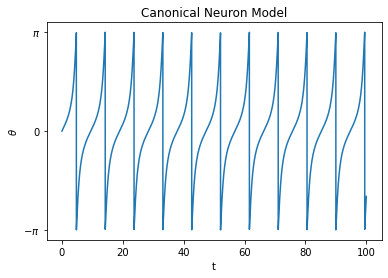

In [6]:
fig, ax = plt.subplots()
plt.rc('font', family='serif')

ax.plot(np.arange(0,total_time,time_step), theta_record[-10000:])

ax.set_title('Canonical Neuron Model')

ax.set_yticks([ - np.pi, 0, np.pi])
ax.set_yticklabels([ '$-\pi$', '0', '$\pi$'])

ax.set_ylabel(r'$\theta$')
ax.set_xlabel('t')

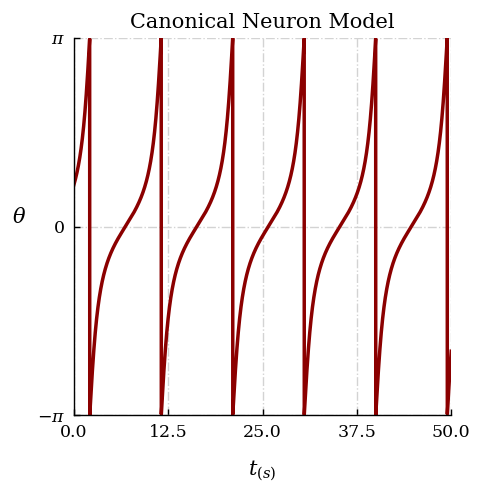

In [11]:
fig = plt.figure(dpi = 100)
ax = fig.add_subplot()
screening_time = 5000
spike_pattern = line(x = np.arange(0,total_time,time_step)[:screening_time],
                     y = theta_record[-screening_time:],
                     ax = ax,
                     title = 'Canonical Neuron Model',
                    x_label = r'$t_{(s)}$',
                    y_label = r'$\theta$',
                    )

ax.set_yticks([ - np.pi, 0, np.pi])
ax.set_yticklabels([ '$-\pi$', '0', '$\pi$'])

fig.savefig('canonical_model_spike_pattern.png')